<a href="https://colab.research.google.com/github/haddriax/CIFAR-10_classifier/blob/main/cifar_10_0_7922_86346_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import layers, models

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
(x_val, y_val) = (x_train[-10000:], y_train[-10000:])
(x_train, y_train) = (x_train[:-10000], y_train[:-10000])

assert x_train.shape == (40000, 32, 32, 3)
assert x_val.shape == (10000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (40000, 1)
assert y_val.shape == (10000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    # Output layer
    layers.Dense(10, activation='softmax')
])

In [ ]:
best_model = None
best_accuracy = 0.0
monitor = 'val_accuracy'

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 86,346 (337.29 KB)

 Trainable params: 85,962 (335.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
epochs = 200

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='saved_cnn.weights.h5',
    monitor=monitor,
    save_best_only=True,
    save_weights_only=True,
    verbose=1)

early_exit_callback = tf.keras.callbacks.EarlyStopping(
    monitor=monitor,
    patience=8,
    restore_best_weights=True,
    verbose=1)

lr_scheduler =  tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=4,
    min_lr=1e-7)

history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[cp_callback, early_exit_callback, lr_scheduler]
                    )

Epoch 1/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.3090 - loss: 1.8458
Epoch 1: val_accuracy improved from -inf to 0.50910, saving model to saved_cnn.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 267s 199ms/step - accuracy: 0.3090 - loss: 1.8456 - val_accuracy: 0.5091 - val_loss: 1.4005 - learning_rate: 0.0010
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5468 - loss: 1.2656
Epoch 2: val_accuracy improved from 0.50910 to 0.59560, saving model to saved_cnn.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 232s 175ms/step - accuracy: 0.5468 - loss: 1.2655 - val_accuracy: 0.5956 - val_loss: 1.1990 - learning_rate: 0.0010
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.6229 - loss: 1.0660
Epoch 3: val_accuracy improved from 0.59560 to 0.63460, saving model to saved_cnn.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 263s 176ms/step - accuracy: 0.6229 - loss: 1.0660 - val_accuracy: 0.6346 - val_loss: 1.0686 - learning_rate: 0.0010
Epoch 4/20

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7821 - loss: 0.6911
Loss:  0.6818547248840332
Accuracy:  0.7831000089645386


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


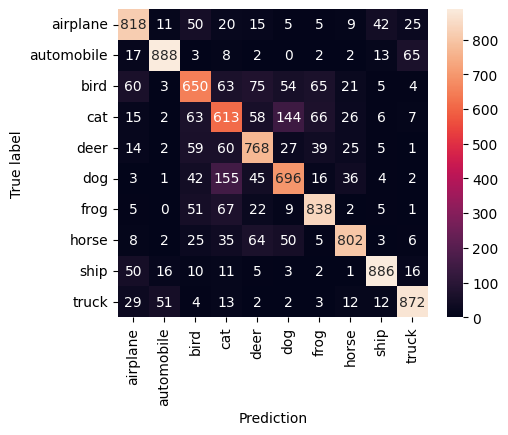

In [ ]:
raw_prediction = model.predict(x_test)

y_pred = np.argmax(raw_prediction, axis=1)

y_true = np.concatenate([y for x, y in zip(x_test, y_test)], axis=0)

import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt='g')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.show()

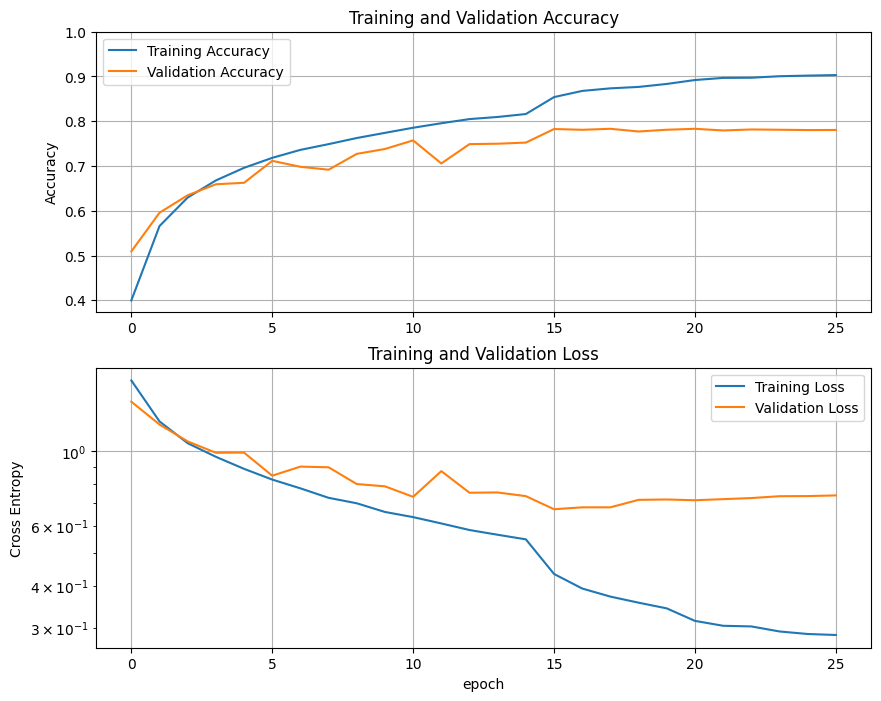

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.grid()
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.yscale('log')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.grid()
plt.show()

In [ ]:
base_model = model.load_weights('saved_cnn.weights.h5')
loss,accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7821 - loss: 0.6911
Loss:  0.6818547248840332
Accuracy:  0.7831000089645386


In [ ]:
model.trainable = True
print("Number of layers in the base model: ", len(model.layers))

fine_tune_at = 16

for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  23


In [ ]:
base_learning_rate = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/100),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
initial_epochs = 50
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='saved_tl.weights.h5',
                                                 monitor='val_loss',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(x_train, y_train,
                    epochs=initial_epochs,
                    validation_data=(x_val, y_val), # Use validation data here
                    callbacks=[cp_callback]
                    )

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8928 - loss: 0.3122
Epoch 1: val_loss improved from inf to 0.65323, saving model to saved_tl.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.8928 - loss: 0.3122 - val_accuracy: 0.7902 - val_loss: 0.6532
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8920 - loss: 0.3177
Epoch 2: val_loss did not improve from 0.65323
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.8920 - loss: 0.3177 - val_accuracy: 0.7915 - val_loss: 0.6556
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8951 - loss: 0.3130
Epoch 3: val_loss did not improve from 0.65323
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.8951 - loss: 0.3130 - val_accuracy: 0.7910 - val_loss: 0.6581
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8955 - loss: 0.3095
Epoch 4: val_loss did not improve from 0.65323
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy:

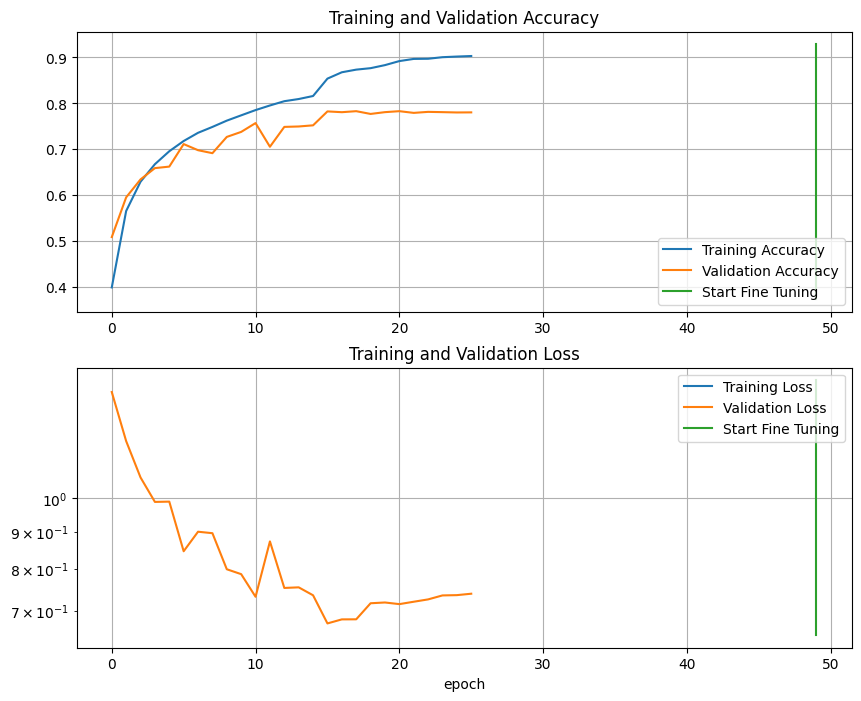

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.yscale('log')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


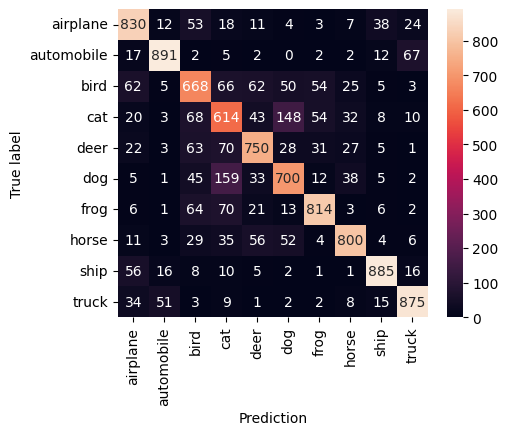

In [ ]:
raw_prediction = model.predict(x_test)

y_pred = np.argmax(raw_prediction, axis=1)

y_true = np.concatenate([y for x, y in zip(x_test, y_test)], axis=0)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt='g')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

loss, accuracy = model.evaluate(x_val, y_val)
print("Vali Loss: ", loss)
print("Vali Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7827 - loss: 0.7470
Test Loss:  0.7344285845756531
Test Accuracy:  0.7827000021934509
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7823 - loss: 0.7253
Vali Loss:  0.6924455761909485
Vali Accuracy:  0.7922999858856201


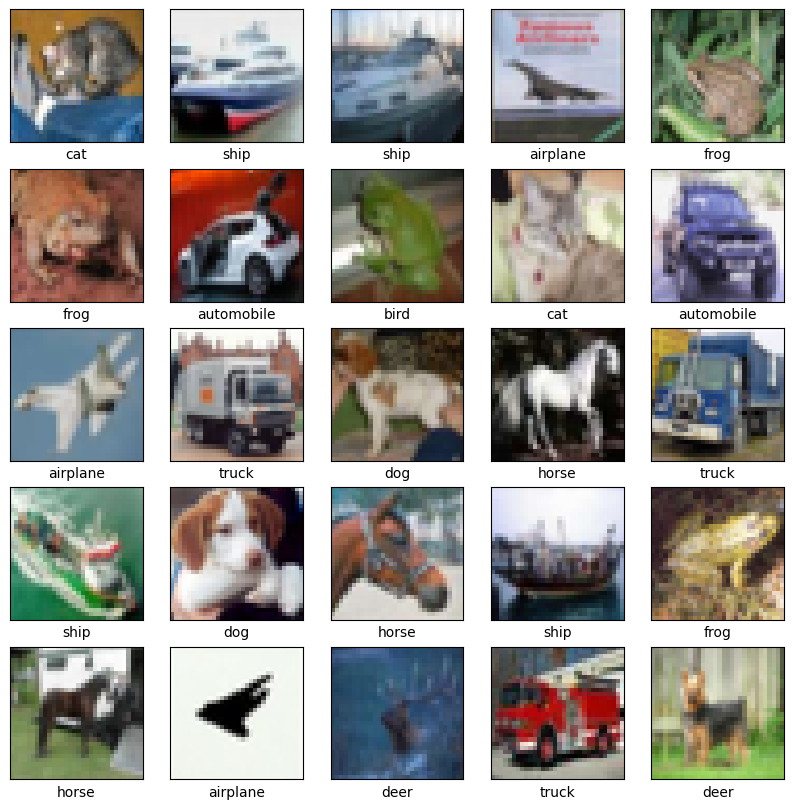

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_pred[i]])
plt.show()